**Data Mining & Analysis About Covid-19**

Dataset Source: https://www.kaggle.com/datasets/meirnizri/covid19-dataset

Problem Statement:

*In the past few years, Covid-19 has changed the way people live. That is caused by the danger of Covid-19 itself which could end people's life. Many people in the world lost their partners because of Covid-19. Therefore it is important if could identify the age which potentially has a high death rate caused by Covid-19, so, we could build up preventive measurement to avoid it.*

In [ ]:
#Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import files
df = pd.read_csv("/content/sample_data/Covid Data.csv")

In [ ]:
#Preview the CSV
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [ ]:
df.columns = [col.lower() for col in df.columns] #Make column name into lower case
df

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


As we see on the code above, that the dataset consist of some attributes with code which detailed below:


* sex: 1 for female and 2 for male.

* age: of the patient.

* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

* pneumonia: whether the patient already have air sacs inflammation or not.

* pregnancy: whether the patient is pregnant or not.

* diabetes: whether the patient has diabetes or not.

* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.

* asthma: whether the patient has asthma or not.

* inmsupr: whether the patient is immunosuppressed or not.

* hypertension: whether the patient has hypertension or not.

* cardiovascular: whether the patient has heart or blood vessels related disease.

* renal chronic: whether the patient has chronic renal disease or not.

* other disease: whether the patient has other disease or not.

* obesity: whether the patient is obese or not.

* tobacco: whether the patient is a tobacco user.

* usmr: Indicates whether the patient treated medical units of the first, second or third level.

* medical unit: type of institution of the National Health System that provided the care.

* intubed: whether the patient was connected to the ventilator.

* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

**Data Cleaning**

In this phase, we will analyze the data by using some visualization techniques. But, before doing the analysis, we need to check the dataset to make sure that there are no NULL data. The NULL data is marked with numbers 97, 98, and 99

In [ ]:
df.shape #Check dataset shape

(1048575, 21)

In [ ]:
df.info() #Check column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

In [ ]:
#Check missing value in each column (97,98,99)
for col in df.columns:
    print(col)
    print(df.loc[df[col] == 97, col].count())
    print(df.loc[df[col] == 98, col].count())
    print(df.loc[df[col] == 99, col].count())
    print()

usmer
0
0
0

medical_unit
0
0
0

sex
0
0
0

patient_type
0
0
0

date_died
0
0
0

intubed
848544
0
7325

pneumonia
0
0
16003

age
135
124
86

pregnant
523511
3754
0

diabetes
0
3338
0

copd
0
3003
0

asthma
0
2979
0

inmsupr
0
3404
0

hipertension
0
3104
0

other_disease
0
5045
0

cardiovascular
0
3076
0

obesity
0
3032
0

renal_chronic
0
3006
0

tobacco
0
3220
0

clasiffication_final
0
0
0

icu
848544
0
7488



In [ ]:
#Parsing missing value of the "pregnant" column
df.groupby(['pregnant', 'sex'])['sex'].count()

pregnant  sex
1         1        8131
2         1      513179
97        2      523511
98        1        3754
Name: sex, dtype: int64

As we could see, the missing value are relative to men (2) which does make sense since men can't be pregnant. Therefore we could replace those value to "2" which means the patient are not pregnant.

In [ ]:
#Change value 97 into 2 in "pregnant" column
df.pregnant = df.pregnant.replace(97, 2)
df.pregnant.value_counts()

2     1036690
1        8131
98       3754
Name: pregnant, dtype: int64

In [ ]:
#Parsing missing value of the "intubed" & "icu" column
df.groupby(['intubed', 'patient_type'])['patient_type'].count()

intubed  patient_type
1        2                33656
2        2               159050
97       1               848544
99       2                 7325
Name: patient_type, dtype: int64

In [ ]:
df.groupby(['icu', 'patient_type'])['patient_type'].count()

icu  patient_type
1    2                16858
2    2               175685
97   1               848544
99   2                 7488
Name: patient_type, dtype: int64

The "intubed" & "icu" columns have a relation with the "patient_type column" since it also determined the "medical_unit" attribute of the patient. Values of 97 represent the patients that have returned home.

Because there is big number of missing values in those columns, we could drop it.

In [ ]:
#Drop the missing value
df.drop(['intubed', 'icu'], axis=1, inplace=True)

In [ ]:
#Preview the first row of dataset
df.head(1)

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3


We could also drop the row that has a missing value in the disease columns therefore our analysis will be not biased.

In [ ]:
#Drop the missing value on other disease columns
df.drop(df.index[df.pneumonia == 99], axis=0, inplace=True)
df.drop(df.index[df.pregnant == 98], axis=0, inplace=True)
df.drop(df.index[df.copd == 98], axis=0, inplace=True)
df.drop(df.index[df.diabetes == 98], axis=0, inplace=True)
df.drop(df.index[df.asthma == 98], axis=0, inplace=True)
df.drop(df.index[df.inmsupr == 98], axis=0, inplace=True)
df.drop(df.index[df.other_disease == 98], axis=0, inplace=True)
df.drop(df.index[df.cardiovascular == 98], axis=0, inplace=True)
df.drop(df.index[df.obesity == 98], axis=0, inplace=True)
df.drop(df.index[df.renal_chronic == 98], axis=0, inplace=True)
df.drop(df.index[df.tobacco == 98], axis=0, inplace=True)

In [ ]:
#Preview the missing value
for col in df.columns:
    print(col)
    print(df.loc[df[col] == 97, col].count())
    print(df.loc[df[col] == 98, col].count())
    print(df.loc[df[col] == 99, col].count())
    print()

usmer
0
0
0

medical_unit
0
0
0

sex
0
0
0

patient_type
0
0
0

date_died
0
0
0

pneumonia
0
0
0

age
128
115
79

pregnant
0
0
0

diabetes
0
0
0

copd
0
0
0

asthma
0
0
0

inmsupr
0
0
0

hipertension
0
178
0

other_disease
0
0
0

cardiovascular
0
0
0

obesity
0
0
0

renal_chronic
0
0
0

tobacco
0
0
0

clasiffication_final
0
0
0



As we could see, there is no more missing value (97, 98, 99) in this dataset. The counted numbers 97, 98, and 99 are the parameter of age and hypertension which is needed to be counted.

After that, we will convert the death date into a new column. If the death date is 9999-99-99 means that the patient is not dead yet.

In [ ]:
#Function for divide the death date into 2 category
def died_col(row):
    if row == '9999-99-99':
        return 2 #Means still life
    else:
        return 1 #Means already dead

In [ ]:
#Apply died_col function
df['died'] = df.date_died.apply(died_col)

In [ ]:
#Delete the date_died column
df.drop('date_died', axis=1, inplace=True)

In [ ]:
#Preview
df.head(2)

,usmer,medical_unit,sex,patient_type,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1


**Data Visualization**

Here we will make a graph, diagram, or plot to analyze the dataset that was already cleaned. The first thing we will analyze is the death date itself.

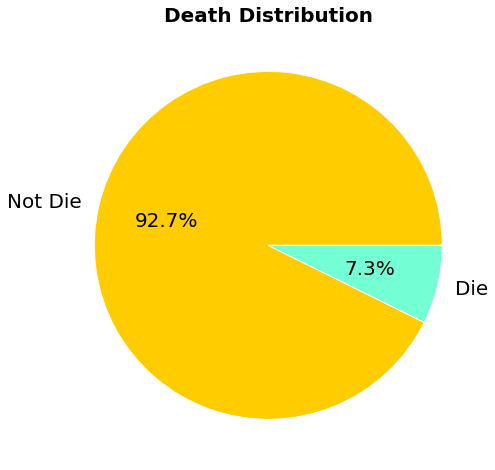

In [ ]:
#Analyzing the death distribution
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    df.died.value_counts().values, labels=['Not Die', 'Die'], autopct='%1.1f%%',
    startangle=0, textprops={'fontsize': 20}, wedgeprops={'edgecolor': '#fff'}, colors=['#ffcc00', '#73ffd3']
    )

ax.set_title('Death Distribution', fontsize=20, color='black', fontweight="bold")
plt.show()

Based in the pie diagram above, we could know that 7.3% of people who got Covid-19 could die.

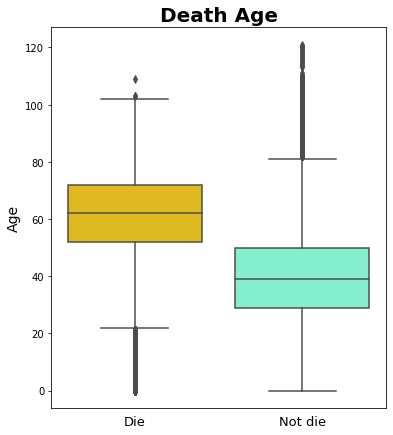

In [ ]:
#Analyzing the death age
plt.figure(figsize=(6, 7))
sns.boxplot(data=df, x='died', y='age', palette=sns.color_palette(['#ffcc00', '#73ffd3']))
plt.title('Death Age', color='black', fontsize=20, fontweight="bold")
plt.xlabel(None)
plt.ylabel('Age', fontsize=14)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Die', 'Not die'], fontsize=13);

Based on the box plot diagram, the person who die because of covid mostly are older people (age around 60 years old)

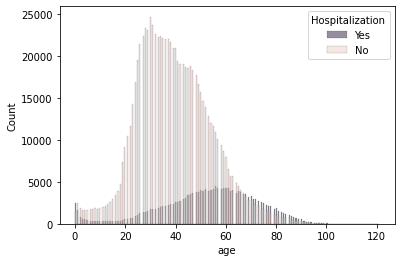

In [ ]:
#Analyzing the hospitalized patient
p_type = sns.histplot(data = df, x='age', hue = 'patient_type') 
plt.legend(title='Hospitalization', loc='upper right', labels=['Yes', 'No'])
plt.show(p_type)

The data show that although older people are risked to be hospitalized for Covid-19, there is also a high possibility that infants with age close to 0 years old could be hospitalized because of Covid-19

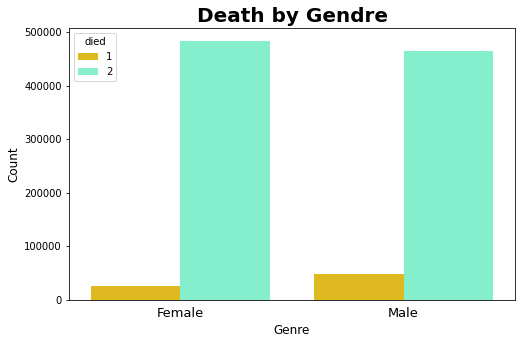

In [ ]:
#Analyzing correlation between Covid-19 and patient gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='died', palette=sns.color_palette(['#ffcc00', '#73ffd3']))
plt.title('Death by Gendre', fontsize=20, color='black', fontweight="bold")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Female', 'Male'], fontsize=13);

**NB:** *1 = Died | 2 = Not Died*
The diagram above shown that there are more Male patient that died than the Female patient

**Conclusion**


1.   Although it is easy for someone to be infected by Covid-19, the death rate is low. This is shown that there is only 7.3% of death cases caused by Covid-19.
2.   Most of the death cases caused by Covid-19 is happens in older people with age close to 60 years old. This could be happening because of the low immune system that the older generation has compared to the younger generation
3.   Besides the older generation, infants with age close to 0 years old also have a high death rate caused by Covid-19. This could be happening because the immune system hasn't grown yet in the infant's body.
4.   The dataset has more data about the female patient than the male patient. But, the death rate of the male patient is higher. The institution needs to analyze more about male patient habits, since, there could be habits that make the Covid-19 death rate to be higher in them.

**Data Preprocessing**

In this phase, we will use the Decision Tree Classifier & Confussion Matrix to if a person will be died because of Covid-19.

In [ ]:
#Importing module for machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
#Split the training and test dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop('died', axis=1), df.died, test_size=0.2, random_state=42)

In [ ]:
x = X_train[['patient_type', 'pneumonia', 'diabetes', 'age']]
y = y_train

#Decision Tree Classifier
treeClf = DecisionTreeClassifier().fit(x, y)
treeClf.score(x, y)

0.9331791655864325

In [ ]:
#Prediction using decision tree
pred_clf = treeClf.predict(X_test[['patient_type', 'pneumonia', 'diabetes', 'age']])

In [ ]:
#Confussion Matrix Array
confusion_matrix(y_test, pred_clf)

array([[  5653,   9058],
       [  4380, 185340]])

In [ ]:
#Confussion Matrix Accuracy Score
accuracy_score(y_test, pred_clf)

0.9342663294705793

In [ ]:
#Confussion Matrix Prediction Score
precision_score(y_test, pred_clf)

0.5634406458686335

In [ ]:
#Confussion Matrix Recall Score
recall_score(y_test, pred_clf)

0.38427027394466723